In [18]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#Read data from the CSV file
df=pd.read_csv("adult-entire dataset.csv")

In [20]:
#Show a sample of the data (first 10 rows)
df.iloc[:10]

,age,workClass,Education,marital-status,occupation,race,sex,hours-per-week,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,White,Female,40,<=50K
6,49,Private,9th,Married-spouse-absent,Other-service,Black,Female,16,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,White,Male,45,>50K
8,31,Private,Masters,Never-married,Prof-specialty,White,Female,50,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,40,>50K


In [21]:
#Show some statistics about the data
df.describe()

,age,hours-per-week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In [22]:
#Show info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   hours-per-week  32561 non-null  int64 
 8   Income          32561 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.2+ MB


In [23]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        value_counts = df[feature].value_counts()
        print(f"Value counts for feature {feature}:")
        print(value_counts)

Value counts for feature workClass:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workClass, dtype: int64
Value counts for feature Education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Value counts for feature marital-status:
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse      

In [24]:
#Dealing with the missing data.
#Replace missing values with NaN
df = df.replace(' ?', pd.NaT)
# Drop rows with NaN values
df = df.dropna()
print('After Droping missing values',df.shape)

After Droping missing values (30718, 9)


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode categorical variables as numerical labels
df['workClass'] = le.fit_transform(df['workClass'])
df['Education'] = le.fit_transform(df['Education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['Income'] = le.fit_transform(df['Income'])

In [26]:
# Check the data types of all the columns
print(df.dtypes)

age               int64
workClass         int32
Education         int32
marital-status    int32
occupation        int32
race              int32
sex               int32
hours-per-week    int64
Income            int32
dtype: object


In [27]:
# Print unique values in each column (excluding 'age' and 'hours_per_week')
for col in df.columns:
    if col not in ['age', 'hours-per-week']:
        print(col, df[col].unique(), '\n')

workClass [5 4 2 0 1 3 6] 

Education [ 9 11  1 12  6 15  7  8  5 10 14  4  0 13  2  3] 

marital-status [4 2 0 3 5 1 6] 

occupation [ 0  3  5  9  7 11  2 13  4  6 12 10  1  8] 

race [4 2 1 0 3] 

sex [1 0] 

Income [0 1] 



In [28]:
#Eliminate any columns from the data that may not be relevant to your objectives
#Eliminate race and sex
df = df.drop(['race', 'sex'], axis=1)

In [29]:
df.shape

(30718, 7)

In [30]:
#Define X and y 
X = df.drop('Income', axis=1)
y=df['Income']
X=np.array(X)
y=np.array(y)

In [31]:
#Normalize the input features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Eigen-values:
 [208.5522091  178.67101479 174.90724483 172.78246481 164.09440341
 146.68792345]


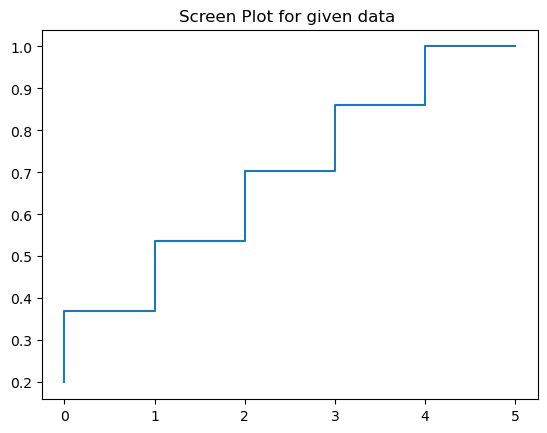

sv =
 [0.1994388  0.37030217 0.53756624 0.70279838 0.85972211 1.        ]


In [32]:
#Dimensionality reduction analysis on the data(Single Value Decomposition)
U, s, VT = np.linalg.svd(X.T)
print('Eigen-values:\n',s)
sv = np.cumsum(s)/sum(s)
plt.step(list(range(len(sv))),sv)
plt.title("Screen Plot for given data ")
plt.show()
print('sv =\n', sv)

In [33]:
sig = np.zeros((X.T.shape[0], X.T.shape[1]))
sig[:X.T.shape[0], :X.T.shape[0]] = np.diag(s)
h = np.dot(np.dot(U, sig), VT)
Xr = np.dot(U.T[0:6,:], X.T)
X_svd=Xr.T
print('After dimension Deduction',X_svd.shape)

After dimension Deduction (30718, 6)


In [34]:
#Split the data into testing and training subsets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_svd,y,test_size=0.3,random_state=47,stratify=y)

In [35]:
#Multi-layer Perceptron class with two hidden layers.
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 500), activation='relu', solver='adam', alpha=0.01,max_iter=500)
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 500), max_iter=500)

In [36]:
#Confusion matrix and the classification report for Multi-layer Perceptron class with two hidden layers.
from sklearn.metrics import classification_report, confusion_matrix  
preds_mlp_2hiddenlayer = mlp.predict(X_test)
cm_mlp_2hiddenlayer = confusion_matrix(y_test, preds_mlp_2hiddenlayer)
print("Confusion matrix for Multi-layer Perceptron class with two hidden layers\n")
print(cm_mlp_2hiddenlayer)
print("\nClassification report for Multi-layer Perceptron class with two hidden layers:\n")
print(classification_report(y_test, preds_mlp_2hiddenlayer)) 

Confusion matrix for Multi-layer Perceptron class with two hidden layers

[[6292  629]
 [1011 1284]]

Classification report for Multi-layer Perceptron class with two hidden layers:

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      6921
           1       0.67      0.56      0.61      2295

    accuracy                           0.82      9216
   macro avg       0.77      0.73      0.75      9216
weighted avg       0.81      0.82      0.82      9216



In [37]:
#Accuracy Score for Multi-layer Perceptron class with two hidden layers.
from sklearn.metrics import accuracy_score
score_mlp_2hiddenlayer = accuracy_score(y_test, preds_mlp_2hiddenlayer)
print("Accuracy Score with two hidden layers:",score_mlp_2hiddenlayer)

Accuracy Score with two hidden layers: 0.8220486111111112


In [38]:
#Use the Multi-layer Perceptron class with three hidden layers.
mlp_3hl = MLPClassifier(hidden_layer_sizes=(100, 500,80), activation='relu', solver='adam', alpha=0.01,max_iter=500)
mlp_3hl.fit(X_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 500, 80), max_iter=500)

In [39]:
#Confusion matrix and the classification report for Multi-layer Perceptron class with three hidden layers.
preds_mlp_3hiddenlayer = mlp_3hl.predict(X_test)
cm_mlp_3hiddenlayer = confusion_matrix(y_test, preds_mlp_3hiddenlayer)
print("Confusion matrix for Multi-layer Perceptron class with three hidden layers\n")
print(cm_mlp_3hiddenlayer)
print("\nClassification report for Multi-layer Perceptron class with three hidden layers:\n")
print(classification_report(y_test, preds_mlp_3hiddenlayer)) 

Confusion matrix for Multi-layer Perceptron class with three hidden layers

[[6162  759]
 [ 969 1326]]

Classification report for Multi-layer Perceptron class with three hidden layers:

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      6921
           1       0.64      0.58      0.61      2295

    accuracy                           0.81      9216
   macro avg       0.75      0.73      0.74      9216
weighted avg       0.81      0.81      0.81      9216



In [40]:
#Accuracy Score for Multi-layer Perceptron class with three hidden layers.
from sklearn.metrics import accuracy_score
score_mlp_3hiddenlayer = accuracy_score(y_test, preds_mlp_3hiddenlayer)
print("Accuracy Score with three hidden layers:",score_mlp_3hiddenlayer)

Accuracy Score with three hidden layers: 0.8125


In [41]:
#Logistic Regression for above dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [42]:
#Accuracy Score for Logistric Regression
y_pred_log = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_log)
print(f"Accuracy for Logistric Regression: {acc}")

Accuracy for Logistric Regression: 0.740234375


In [45]:
#Confusion matrix and the classification report for Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix  
cm_log =confusion_matrix(y_test, y_pred_log)
print("Confusion matrix for Logistric Regression:\n",cm_log)
print("\nClassification report for Logistric Regression:\n")
print(classification_report(y_test,y_pred_log)) 

Confusion matrix for Logistric Regression:
 [[6522  399]
 [1995  300]]

Classification report for Logistric Regression:

              precision    recall  f1-score   support

           0       0.77      0.94      0.84      6921
           1       0.43      0.13      0.20      2295

    accuracy                           0.74      9216
   macro avg       0.60      0.54      0.52      9216
weighted avg       0.68      0.74      0.68      9216



In [43]:
#Using the Naïve Bayes algorithm. 
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_naive = nb.predict(X_test)

print("Confusion matrix for Naive Bayes:\n",confusion_matrix(y_test, y_pred_naive))
print("\nClassification report for Naive Bayes:\n")
print(classification_report(y_test, y_pred_naive))
accuracy_naive = accuracy_score(y_test, y_pred_naive)
print(f"Accuracy for Naive Bayes: ",accuracy_naive)

Confusion matrix for Naive Bayes:
 [[6490  431]
 [1605  690]]

Classification report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      6921
           1       0.62      0.30      0.40      2295

    accuracy                           0.78      9216
   macro avg       0.71      0.62      0.63      9216
weighted avg       0.76      0.78      0.75      9216

Accuracy for Naive Bayes:  0.7790798611111112


In [44]:
#Using the K-Means clustering algorithm on the dataset 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# check the accuracy of clustering with income
income_labels = df['Income'].apply(lambda x: 0 if x == '<=50K' else 1)
accuracy_kmeans = sum(labels == income_labels) / len(df)
print(f"Clustering accuracy: {accuracy_kmeans}")


Clustering accuracy: 0.5969789699850251
